# Distribution of Property Ownership in Los Angeles
###  Explore the racial breakdown of home ownership throughout the city. Within racial / ethnic enclaves, visualize the concentrations of home ownership.  
#### Joshua Claxton

### I. Import

In [165]:
# import librariies
import pandas as pd
import geopandas as gpd

In [166]:
# load ACS demographic data
df = pd.read_csv('data/R13287531_SL140.csv',
                 dtype=
                 {'Geo_FIPS': str,
                 'Geo_STATE':str,
                 'Geo_COUNTY':str}
                )

In [167]:
# overview of data 
df.shape

(2498, 172)

In [168]:
df.head()

,Geo_FIPS,Geo_QName,Geo_FILEID,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_LOGRECNO,Geo_US,Geo_REGION,Geo_DIVISION,...,SE_A03001B_010,PCT_SE_A03001B_002,PCT_SE_A03001B_003,PCT_SE_A03001B_004,PCT_SE_A03001B_005,PCT_SE_A03001B_006,PCT_SE_A03001B_007,PCT_SE_A03001B_008,PCT_SE_A03001B_009,PCT_SE_A03001B_010
0,06037101110,"Census Tract 1011.10, Los Angeles County, Cali...",ACSSF,ca,140,0,4200,NaN,NaN,NaN,...,207,68.01,0.00,0.0,9.01,0.00,8.07,14.91,57.76,32.14
1,06037101122,"Census Tract 1011.22, Los Angeles County, Cali...",ACSSF,ca,140,0,4201,NaN,NaN,NaN,...,33,83.43,0.00,0.0,0.00,0.00,9.59,6.98,83.43,9.59
2,06037101220,"Census Tract 1012.20, Los Angeles County, Cali...",ACSSF,ca,140,0,4202,NaN,NaN,NaN,...,285,59.06,1.05,2.1,6.30,0.00,14.44,17.06,51.71,37.40
3,06037101221,"Census Tract 1012.21, Los Angeles County, Cali...",ACSSF,ca,140,0,4203,NaN,NaN,NaN,...,269,71.49,5.96,0.0,2.19,0.00,15.61,4.74,65.53,23.60
4,06037101222,"Census Tract 1012.22, Los Angeles County, Cali...",ACSSF,ca,140,0,4204,NaN,NaN,NaN,...,239,87.62,2.08,0.0,3.43,2.08,3.43,1.35,63.11,29.29


In [169]:
df.info(verbose= True, show_counts= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 172 columns):
 #    Column              Non-Null Count  Dtype  
---   ------              --------------  -----  
 0    Geo_FIPS            2498 non-null   object 
 1    Geo_QName           2498 non-null   object 
 2    Geo_FILEID          2498 non-null   object 
 3    Geo_STUSAB          2498 non-null   object 
 4    Geo_SUMLEV          2498 non-null   int64  
 5    Geo_GEOCOMP         2498 non-null   int64  
 6    Geo_LOGRECNO        2498 non-null   int64  
 7    Geo_US              0 non-null      float64
 8    Geo_REGION          0 non-null      float64
 9    Geo_DIVISION        0 non-null      float64
 10   Geo_STATECE         0 non-null      float64
 11   Geo_STATE           2498 non-null   object 
 12   Geo_COUNTY          2498 non-null   object 
 13   Geo_COUSUB          0 non-null      float64
 14   Geo_PLACE           0 non-null      float64
 15   Geo_TRACT           2498 non-null   

### II. Clean data

In [170]:
# drop columns of all missing values left by Social Explorer
df = df.dropna(axis=1, how="all")
df.head()

,Geo_FIPS,Geo_QName,Geo_FILEID,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_LOGRECNO,Geo_STATE,Geo_COUNTY,Geo_TRACT,...,SE_A03001B_010,PCT_SE_A03001B_002,PCT_SE_A03001B_003,PCT_SE_A03001B_004,PCT_SE_A03001B_005,PCT_SE_A03001B_006,PCT_SE_A03001B_007,PCT_SE_A03001B_008,PCT_SE_A03001B_009,PCT_SE_A03001B_010
0,06037101110,"Census Tract 1011.10, Los Angeles County, Cali...",ACSSF,ca,140,0,4200,06,037,101110,...,207,68.01,0.00,0.0,9.01,0.00,8.07,14.91,57.76,32.14
1,06037101122,"Census Tract 1011.22, Los Angeles County, Cali...",ACSSF,ca,140,0,4201,06,037,101122,...,33,83.43,0.00,0.0,0.00,0.00,9.59,6.98,83.43,9.59
2,06037101220,"Census Tract 1012.20, Los Angeles County, Cali...",ACSSF,ca,140,0,4202,06,037,101220,...,285,59.06,1.05,2.1,6.30,0.00,14.44,17.06,51.71,37.40
3,06037101221,"Census Tract 1012.21, Los Angeles County, Cali...",ACSSF,ca,140,0,4203,06,037,101221,...,269,71.49,5.96,0.0,2.19,0.00,15.61,4.74,65.53,23.60
4,06037101222,"Census Tract 1012.22, Los Angeles County, Cali...",ACSSF,ca,140,0,4204,06,037,101222,...,239,87.62,2.08,0.0,3.43,2.08,3.43,1.35,63.11,29.29


In [171]:
# keep only columns needed for our analysis
df_2 = df[['Geo_FIPS',
           'SE_A10010_001',
           'SE_A10010_002',
           'SE_A10010_003',
           'SE_A10010_004',
           'SE_A10010_005',
           'SE_A10010_006',
           'SE_A10010_007',
           'SE_A10010_008',
           'SE_A10010_009',
           'SE_A10010_010']]
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Geo_FIPS       2498 non-null   object
 1   SE_A10010_001  2498 non-null   int64 
 2   SE_A10010_002  2498 non-null   int64 
 3   SE_A10010_003  2498 non-null   int64 
 4   SE_A10010_004  2498 non-null   int64 
 5   SE_A10010_005  2498 non-null   int64 
 6   SE_A10010_006  2498 non-null   int64 
 7   SE_A10010_007  2498 non-null   int64 
 8   SE_A10010_008  2498 non-null   int64 
 9   SE_A10010_009  2498 non-null   int64 
 10  SE_A10010_010  2498 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 214.8+ KB


In [172]:
# adjust column names and get summary statistics
df_2.columns = ['FIPS',
                'Households',
                'With a Householder Who Is White Alone',
                'With a Householder Who Is Black or African  American Alone',
                'With a Householder Who Is American Indian and  Alaska Native Alone',
                'With a Householder Who Is Asian Alone',
                'With a Householder Who Is Native Hawaiian and  Other Pacific Islander Alone',
                'With a Householder Who Is Some Other Race Alone',
                'With a Householder Who Is Two or More Races',
                'With a Householder Who Is Hispanic or Latino',
                'With a Householder Who Is White Alone, Not  Hispanic or Latino']
df_2.describe()

,Households,With a Householder Who Is White Alone,With a Householder Who Is Black or African American Alone,With a Householder Who Is American Indian and Alaska Native Alone,With a Householder Who Is Asian Alone,With a Householder Who Is Native Hawaiian and Other Pacific Islander Alone,With a Householder Who Is Some Other Race Alone,With a Householder Who Is Two or More Races,With a Householder Who Is Hispanic or Latino,"With a Householder Who Is White Alone, Not Hispanic or Latino"
count,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000
mean,1338.194956,656.997598,124.614091,11.837070,203.141313,2.966373,226.067654,112.570857,511.819055,459.787830
std,544.558643,467.140375,209.578800,18.177921,243.375247,11.684636,185.875016,78.200537,336.000548,482.402807
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,981.000000,315.000000,13.000000,0.000000,42.000000,0.000000,70.250000,55.000000,240.000000,76.000000
50%,1287.000000,541.000000,52.000000,4.000000,124.000000,0.000000,188.000000,100.000000,476.500000,290.000000
75%,1620.750000,905.000000,139.000000,18.000000,261.000000,0.000000,342.750000,155.000000,729.750000,724.500000
max,5202.000000,3723.000000,2054.000000,161.000000,1646.000000,323.000000,1168.000000,646.000000,1808.000000,3566.000000


### III. Exploration of Black homeownership

<AxesSubplot: title={'center': 'What census tracts have black-owned homes?'}, ylabel='FIPS'>

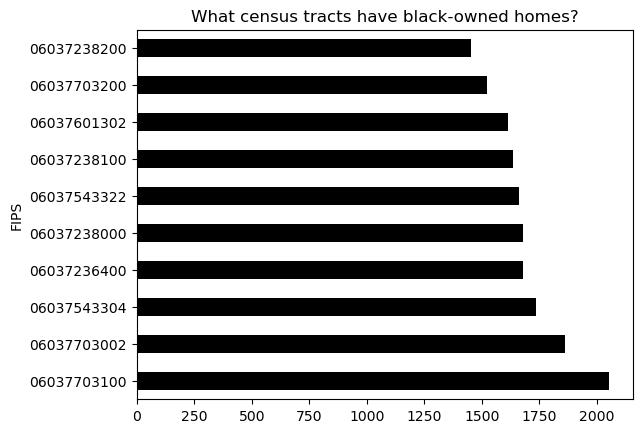

In [173]:
# sort and make quick bar graph of black homes
df_2_sorted = df_2.sort_values(by=['With a Householder Who Is Black or African  American Alone'],ascending=False)
df_2_sorted.head(10).plot.barh(x='FIPS',
                               y='With a Householder Who Is Black or African  American Alone',
                               title='What census tracts have black-owned homes?',
                               color='black',
                               legend=False)

<AxesSubplot: title={'center': 'Racial segregation in LA and lack of black ownership'}, xlabel='With a Householder Who Is Black or African  American Alone', ylabel='With a Householder Who Is White Alone'>

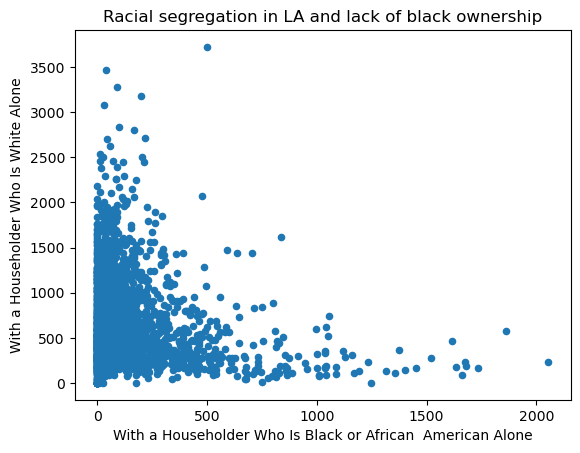

In [174]:
# scatterplot showing racial segregation
df_2_sorted.plot.scatter(x ='With a Householder Who Is Black or African  American Alone',
                             y = 'With a Householder Who Is White Alone',
                         title='Racial segregation in LA and lack of black ownership')

### IV. Merge with polygons to produce maps

<AxesSubplot: >

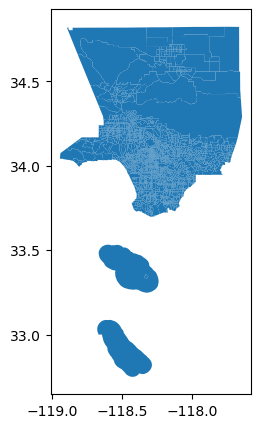

In [175]:
# read in census tracts
tracts = gpd.read_file('data/Census_Tracts_2020.geojson')
tracts.plot(figsize=(12,5))

In [176]:
tracts.head()

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry
0,1,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,2,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,3,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.28100 34.25592, -118.28198 34.2..."
3,4,101221,1012.21,3.812000e+06,9161.710543,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,5,101222,1012.22,3.191371e+06,9980.600461,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."


In [177]:
# create FIPS column in census tract dataframe for merge
tracts['FIPS']= '06'+'037'+tracts['CT20']
tracts.head()

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry,FIPS
0,1,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",06037101110
1,2,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.29015 34.27417, -118.29015 34.2...",06037101122
2,3,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.28100 34.25592, -118.28198 34.2...",06037101220
3,4,101221,1012.21,3.812000e+06,9161.710543,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",06037101221
4,5,101222,1012.22,3.191371e+06,9980.600461,"POLYGON ((-118.28594 34.25405, -118.28594 34.2...",06037101222


<AxesSubplot: >

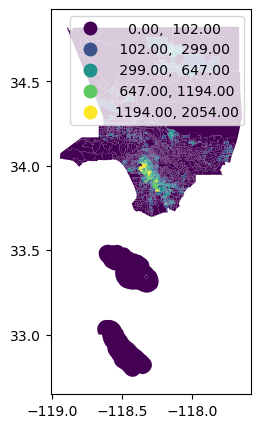

In [178]:
# merge and map
tracts_race_own_home = tracts.merge(df_2,on='FIPS')
tracts_race_own_home.plot(figsize=(12,5),
                          column='With a Householder Who Is Black or African  American Alone',
                          legend=True,
                          scheme='NaturalBreaks')

### Next steps in future analysis: how does this distribution compare to where black folks live? Are black folks home owners in their neighborhoods? We will likely need to adjust scale to see this.